In [2]:
import numpy as np
import pandas as pd
import cmath
import math
import random
import matplotlib.pyplot as plt

In [3]:
def dct(x,N):
    #W = complex(math.cos(2*math.pi/2*N), -math.sin(2*math.pi/2*N))
    Z = [0]*(N)
    for k in range(N):
        for i in range(N):
            Z[k] = Z[k] + 2*x[i]*math.cos(math.pi * k * (2*i + 1)/ (2 *N))
    return Z

In [4]:
def idct(x,N):
#    print(x)
    #W = complex(math.cos(2*math.pi/2*N), -math.sin(2*math.pi/2*N))
    Z = [0]*(N)
    for n in range(N):
        for k in range(N):
            if(k == 0):
                Z[n] = Z[n] + (1/2)*x[k]*math.cos(math.pi * k * (2*n + 1)/ (2 *N))
            else:
                Z[n] = Z[n] + x[k]*math.cos(math.pi * k * (2*n + 1)/ (2 *N))
        
                
        Z[n] = (1/N) * Z[n]
#    print(Z)
    return Z

In [5]:
def dft(x,N):
    W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
    W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            W_matrix[i][j] = (W**(i*j))
    x = np.matrix(x)
    return np.array(W_matrix.dot(x.T))[:,0]

In [6]:
def idft(x,N):
    W = complex(math.cos(2*math.pi/N), -math.sin(2*math.pi/N))
    W_matrix = np.ndarray(shape=(N,N), dtype=np.complex128)
    for i in range(N):
        for j in range(N):
            W_matrix[i][j] = 1/(W**(i*j))
    x = np.matrix(x)
    return (1/N)*np.array(W_matrix.dot(x.T))[:,0]

In [7]:
h2 = np.array([[1,1],[1,-1]])
def haar_mat(n):
    n = int(n)
    if n == 1:
        return h2
    else:
        a = np.kron(haar_mat(n-1),[1,1])
        b = np.kron(np.identity(int(math.pow(2,n-1)))*math.pow(2,(n-1)/2.0),[1,-1])
        #print(np.concatenate((a,b),axis=0))
        return np.concatenate((a,b),axis=0)
def haar(x):
    return np.matmul(haar_mat(math.log(len(x),2)),np.transpose(x))

In [8]:
def inverse_haar(y):
    n = int(math.log(len(y),2))
    N = len(y)
    hn = haar_mat(n)
    return np.matmul(np.transpose(hn)/N,np.transpose(y))

In [9]:
L = [i for i in range(64)]
def modified_dct(x, N):
    x_mod = []
    for l in L:
        y = [0]*N
        for i in range(N-l):
            y[i] = x[i]
        x_mod.append(y)
    return x_mod

In [10]:
def modified_dft(x,N):
    x_mod = []
    for l in L:
        y = [0]*N
        for i in range(int(((N-l-1)/2))+ 1):
            y[i] = x[i]
        for j in range(int((N+l+1)/2),N):
            y[j] = x[j]
        x_mod.append(y)
    return x_mod

In [11]:
def modified_haar(x, N):
    x_mod = []
    for l in L:
        y = [0]*N
        for i in range(N-l):
            y[i] = x[i]
        x_mod.append(y)
    return x_mod

In [12]:
#Array Input of length 64
z = []
z_ = []
N = 64
for i in range(N):
    z.append(random.uniform(0, 100))
for i in range(N):
    z_.append(complex(z[i]))

In [13]:
z_dct = dct(z,N)
mod_dct = modified_dct(z_dct,N)
mod_idct = []
for j in range(N):
    mod_idct.append(idct(mod_dct[j],N))

In [14]:
#Energy Compaction in DCT
e_dct = []
for i in range(N):
    e_dct.append((np.sum(abs(np.array(z)-np.array(mod_idct[i]))**2)) / N)

In [15]:
z_dft = dft(z_,N)
mod_dft = modified_dft(z_dft,N)
mod_idft = []
for j in range(N):
    mod_idft.append(idft(mod_dft[j],N))

In [16]:
#Energy Compaction in DFT
e_dft = []
for i in range(N):
    e_dft.append((np.sum(abs(np.array(z_)-np.array(mod_idft[i]))**2)) / N)

In [17]:
x = np.array(z)
z_haar = haar(x)
mod_haar = modified_haar(z_haar,N)
mod_ihaar = []
for j in range(N):
    mod_ihaar.append(inverse_haar(mod_haar[j]))

In [18]:
#Energy Compaction in Haar
e_haar = []
for i in range(N):
    e_haar.append((np.sum(abs(x-np.array(mod_ihaar[i]))**2)) / N)

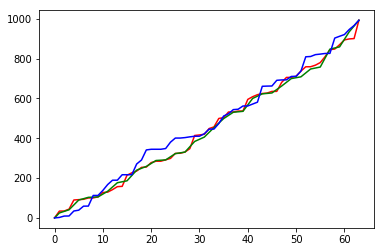

In [19]:
plt.plot(e_dct,'r')
plt.plot(e_dft, 'g')
plt.plot(e_haar,'b')
plt.show()